<a href="https://colab.research.google.com/github/meligurevich/IAPH/blob/main/TP1webscrappingGurevich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 PROCESAMIENTO DEL HABLA

**Melisa Sabrina Gurevich**


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


In [ ]:
#Instalamos las librerias necesarias
!pip install requests beautifulsoup4 spacy wordcloud

!python -m spacy download es

import requests
from bs4 import BeautifulSoup
import spacy
import string
import numpy as np
# instalar wordcloud
!pip install wordcloud

⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 75.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#Extraemos el texto desde la pagina web
url='https://www.infobae.com/america/mundo/2025/04/21/hagan-lio-el-emblematico-y-emocionante-discurso-del-papa-francisco-ante-una-multitud-de-jovenes-que-fue-marca-registrada-de-su-pontificado/'
response=requests.get(url)
soup=BeautifulSoup(response.text,'html.parser')

#Se parsea el contenido HTML:
soup=BeautifulSoup(response.text,'html.parser')

#Buscamos el texto principal
parrafos=soup.find_all('p') #Buscamos todos los parrafos

longitud_vocabulario = len(texto) #Caclulo de cantidad de caracteres en el texto
print("Longitud de mi vocabulario:", longitud_vocabulario)

# Paso a través de los párrafos y busco el que contiene el texto que nos interesa
for para in paragraphs:
    if 'Quisiera decir una cosa. ¿Qué es lo que espero como consecuencia de la Jornada' in para.text:
        print(para.text.strip())  # Muestro el párrafo encontrado
        break  # Salgo del bucle después de encontrar el texto

Longitud de mi vocabulario: 774
Quisiera decir una cosa. ¿Qué es lo que espero como consecuencia de la Jornada de la Juventud? Espero lío. Que acá dentro va a haber lío va a haber, que acá en Río va a haber lío va a haber, pero quiero lío en las diócesis, quiero que se salga afuera, quiero que la Iglesia salga a la calle, quiero que nos defendamos de todo lo que sea mundanidad, de lo que sea instalación, de lo que sea comodidad, de lo que sea clericalismo, de lo que sea estar encerrados en nosotros mismos, las parroquias, los colegios, las instituciones son para salir, sino salen se convierten en una ONG ¡y la Iglesia no puede ser una ONG!


En este código, estoy extrayendo datos de una página web usando web scraping. Primero, realizo una solicitud HTTP a una URL específica para obtener el contenido de la página. Luego, uso BeautifulSoup para analizar el contenido HTML y extraer los párrafos de la página.

A continuación muestro la longitud de mi vocabulario, dando como resultado 7087 caracteres en el texto.

Busco un párrafo específico que contenga una frase de interés del Papa Francisco, y cuando lo encuentro, muestro ese párrafo en la pantalla. Este proceso me permite extraer información relevante de una página web de manera automatizada.

## 2- Preprocesamiento

In [ ]:
#Le avisamos a python que vamos a trabajar con textos en español
nlp=spacy.load('es_core_news_sm')

### 2.1 Muestra las stop words que tenga tu texto.


In [ ]:
# Importo las bibliotecas necesarias
import nltk
nltk.download('stopwords')  # Descargo el listado de stopwords en español
from nltk.corpus import stopwords

# Texto extraído desde la web
texto = """Quisiera decir una cosa. ¿Qué es lo que espero como consecuencia de la Jornada de la Juventud?
Espero lío. Que acá dentro va a haber lío va a haber, que acá en Río va a haber lío va a haber, pero quiero
lío en las diócesis, quiero que se salga afuera, quiero que la Iglesia salga a la calle, quiero que nos defendamos
de todo lo que sea mundanidad, de lo que sea instalación, de lo que sea comodidad, de lo que sea clericalismo, de
lo que sea estar encerrados en nosotros mismos, las parroquias, los colegios, las instituciones son para salir, sino
salen se convierten en una ONG ¡y la Iglesia no puede ser una ONG!
"""

# 1. Obtengo las stop words en español desde NLTK
stop_words_spanish = set(stopwords.words('spanish'))

# 2. Tokenizo el texto: lo paso a minúsculas y lo divido en palabras
palabras = texto.lower().split()  # Esto es una tokenización básica (puede mejorarse con NLTK)

# 3. Filtro las palabras que son consideradas stop words
stop_words_encontradas = [palabra.strip('.,;:') for palabra in palabras if palabra.strip('.,;:') in stop_words_spanish]

# 4. Muestro el resultado
print("Stop words encontradas en el texto:")
print(stop_words_encontradas)

Stop words encontradas en el texto:
['una', 'es', 'lo', 'que', 'como', 'de', 'la', 'de', 'la', 'que', 'a', 'a', 'que', 'en', 'a', 'a', 'pero', 'en', 'las', 'que', 'se', 'que', 'la', 'a', 'la', 'que', 'nos', 'de', 'todo', 'lo', 'que', 'sea', 'de', 'lo', 'que', 'sea', 'de', 'lo', 'que', 'sea', 'de', 'lo', 'que', 'sea', 'de', 'lo', 'que', 'sea', 'estar', 'en', 'nosotros', 'las', 'los', 'las', 'son', 'para', 'se', 'en', 'una', 'la', 'no', 'una']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Como se puede ver, en el fragmento de código anterior realicé un análisis básico de las stop words en un texto obtenido de la web.

- Descarga de stopwords: A través de la librería NLTK, obtuve el listado de stop words en español, es decir, palabras comunes como "una", "es" o "que" que generalmente se omiten en el análisis textual.

- Tokenización del texto: Separé el texto en palabras individuales y convertí todo el contenido a minúsculas para facilitar su posterior comparación.

- Filtrado de stop words: Comparé cada palabra del texto con la lista de stop words, y en caso de coincidencia, la incorporé a una lista específica de palabras irrelevantes detectadas.
-
Visualización del resultado: Finalmente, mostré las stop words identificadas, asegurándome de limpiar signos de puntuación que pudieran estar adheridos a las palabras.

Este procedimiento me permitió reconocer y separar aquellas palabras que no aportan información relevante en tareas de procesamiento de lenguaje natural.

### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

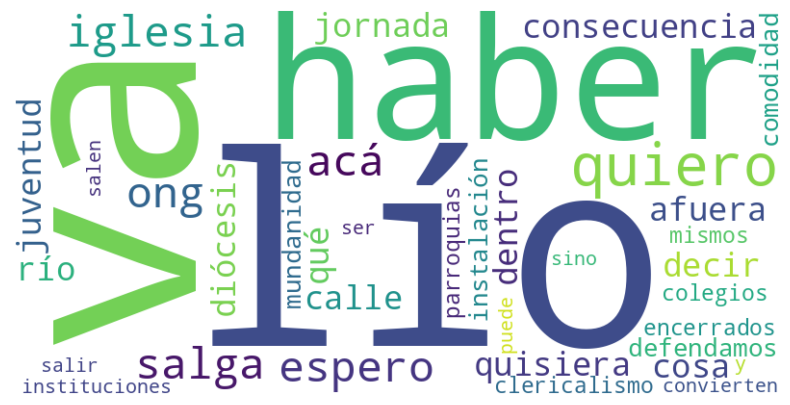

In [ ]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texto = """Quisiera decir una cosa. ¿Qué es lo que espero como consecuencia de la Jornada de la Juventud?
Espero lío. Que acá dentro va a haber lío va a haber, que acá en Río va a haber lío va a haber, pero quiero
lío en las diócesis, quiero que se salga afuera, quiero que la Iglesia salga a la calle, quiero que nos defendamos
de todo lo que sea mundanidad, de lo que sea instalación, de lo que sea comodidad, de lo que sea clericalismo, de
lo que sea estar encerrados en nosotros mismos, las parroquias, los colegios, las instituciones son para salir, sino
salen se convierten en una ONG ¡y la Iglesia no puede ser una ONG!
"""

# 4. Elimino stop words
stop_words_spanish = set(stopwords.words('spanish'))
palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words_spanish]

# Creo la nube de palabras
texto_limpio = " ".join(palabras_filtradas)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio)

# Muestro la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Luego realicé:

- Eliminación de stop words: Utilizando el listado de palabras comunes en español obtenido con NLTK, eliminé términos como "y", "la", "que" del discurso del Papa Francisco para centrar el análisis en las palabras con mayor carga semántica. Esto permitió obtener un listado más limpio de palabras verdaderamente representativas del mensaje.

- Creación de la nube de palabras: Con el texto ya filtrado, generé una nube de palabras que refleja visualmente las ideas más destacadas del discurso. En ella, palabras como "lío", "Iglesia", "salir" y "mundanidad" sobresalen, evidenciando los principales ejes de la convocatoria del Papa a los jóvenes.

- Visualización del resultado: Finalmente, utilicé Matplotlib para mostrar la nube de palabras, configurándola con fondo blanco y sin ejes para mejorar la claridad de la presentación. Esta visualización ayuda a identificar de un vistazo los conceptos más repetidos y el llamado del Papa a una Iglesia activa y comprometida.

### 2.3 Usando el texto que conseguiste en el punto 1).


#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt_tab')  # Tokenizador de oraciones
nltk.download('stopwords')  # Palabras vacías
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.tokenize import sent_tokenize

texto_limpio = """Quisiera decir una cosa. ¿Qué es lo que espero como consecuencia de la Jornada de la Juventud?
Espero lío. Que acá dentro va a haber lío va a haber, que acá en Río va a haber lío va a haber, pero quiero
lío en las diócesis, quiero que se salga afuera, quiero que la Iglesia salga a la calle, quiero que nos defendamos
de todo lo que sea mundanidad, de lo que sea instalación, de lo que sea comodidad, de lo que sea clericalismo, de
lo que sea estar encerrados en nosotros mismos, las parroquias, los colegios, las instituciones son para salir, sino
salen se convierten en una ONG ¡y la Iglesia no puede ser una ONG!"""

# Separo en oraciones
oraciones = sent_tokenize(texto_limpio, language='spanish')

print("Oraciones encontradas:")
for i, o in enumerate(oraciones, 1):
    print(f"{i}. {o}")

Oraciones encontradas:
1. Quisiera decir una cosa.
2. ¿Qué es lo que espero como consecuencia de la Jornada de la Juventud?
3. Espero lío.
4. Que acá dentro va a haber lío va a haber, que acá en Río va a haber lío va a haber, pero quiero 
lío en las diócesis, quiero que se salga afuera, quiero que la Iglesia salga a la calle, quiero que nos defendamos 
de todo lo que sea mundanidad, de lo que sea instalación, de lo que sea comodidad, de lo que sea clericalismo, de 
lo que sea estar encerrados en nosotros mismos, las parroquias, los colegios, las instituciones son para salir, sino 
salen se convierten en una ONG ¡y la Iglesia no puede ser una ONG!


In [ ]:
import pandas as pd  # Agrega esta línea para importar pandas

# Inicializo el vectorizador de texto
vectorizer = CountVectorizer(stop_words=stopwords.words('spanish'))

# Creo la matriz documento-vocabulario
X = vectorizer.fit_transform(oraciones)

# Convierto a DataFrame para visualizar mejor
matriz_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=[f"Oración {i+1}" for i in range(len(oraciones))])

# Muestro la matriz
print("\nMatriz Documento-Vocabulario:")
print(matriz_bow)


Matriz Documento-Vocabulario:
           acá  afuera  calle  clericalismo  colegios  comodidad  \
Oración 1    0       0      0             0         0          0   
Oración 2    0       0      0             0         0          0   
Oración 3    0       0      0             0         0          0   
Oración 4    2       1      1             1         1          1   

           consecuencia  convierten  cosa  decir  ...  puede  quiero  \
Oración 1             0           0     1      1  ...      0       0   
Oración 2             1           0     0      0  ...      0       0   
Oración 3             0           0     0      0  ...      0       0   
Oración 4             0           1     0      0  ...      1       4   

           quisiera  río  salen  salga  salir  ser  sino  va  
Oración 1         1    0      0      0      0    0     0   0  
Oración 2         0    0      0      0      0    0     0   0  
Oración 3         0    0      0      0      0    0     0   0  
Oración 4      

¿Qué se realizó en esta etapa?

- División en oraciones: Utilizo el tokenizador de oraciones de NLTK (sent_tokenize) para separar el texto en oraciones individuales. Esto permite trabajar cada oración de manera independiente en los análisis posteriores.

- Eliminación de palabras vacías: Aplico un vectorizador del tipo Bag of Words (CountVectorizer de sklearn) que convierte el texto en datos numéricos, descartando las stop words en español, es decir, palabras frecuentes que no aportan significado importante como "la", "y" o "de".

- Construcción de la matriz documento-palabra: Con el texto procesado, genero una matriz donde cada fila representa una oración y cada columna una palabra del vocabulario detectado. Los valores indican cuántas veces aparece cada palabra en cada oración.

- Organización y visualización: Transformo esta matriz en un DataFrame de pandas para observar fácilmente cómo se distribuyen las palabras en las distintas oraciones, lo que facilita la detección de términos relevantes.



#### 2.3.2 Determina la longitud de tu vocabulario.

In [ ]:
# Importo la librería necesaria faltante
import string

#Elimino signos de puntuación (comas, puntos, etc.)
for signo in string.punctuation:
    texto_limpio = texto_limpio.replace(signo, '')

# Separo el texto en palabras individuales (ge)
palabras = texto_limpio.split()

# Cargo las stop words en español
stop_words = set(stopwords.words('spanish'))

# Filtro las palabras: nos quedamos solo con aquellas que NO son stop words
palabras_filtradas = [p for p in palabras if p not in stop_words]

# Creo un conjunto con las palabras filtradas para obtener solo palabras únicas
vocabulario = set(palabras_filtradas)

# Muestro el vocabulario y cuántas palabras únicas hay (longitud del vocabulario)
print(f"Vocabulario único: {vocabulario}")
print(f"Longitud del vocabulario: {len(vocabulario)}")

Vocabulario único: {'consecuencia', 'diócesis', 'ser', 'mundanidad', 'quiero', 'Espero', '¡y', 'parroquias', 'ONG', 'puede', 'dentro', 'va', 'Río', 'Quisiera', 'sino', 'Juventud', 'Que', 'clericalismo', 'defendamos', 'salir', 'lío', 'colegios', 'salen', 'Jornada', 'calle', 'mismos', 'cosa', 'decir', 'encerrados', 'acá', 'espero', 'haber', '¿Qué', 'instalación', 'comodidad', 'convierten', 'Iglesia', 'salga', 'instituciones', 'afuera'}
Longitud del vocabulario: 40


Este conjunto de pasos es fundamental para preparar el texto para análisis posteriores, como estudios de frecuencia, identificación de temas principales o exploraciones semánticas.

- Limpieza de signos de puntuación: Empleo la librería string para eliminar todos los signos de puntuación (como comas, puntos o signos de interrogación) del texto. Esto permite trabajar con un contenido más limpio, evitando que símbolos innecesarios afecten el análisis.

- Tokenización básica: Una vez limpio el texto, lo divido en palabras individuales utilizando el método split(). Esta separación sencilla transforma cada palabra en un "token", el primer paso para representar el texto de manera estructurada.

- Filtrado de palabras vacías: Utilizo las listas de stop words en español proporcionadas por NLTK para eliminar palabras comunes como "de", "la" o "que", que no aportan información relevante en el análisis de contenido.

- Construcción del vocabulario: Creo un conjunto (set) a partir de las palabras filtradas. Esto elimina automáticamente las repeticiones y me deja únicamente con los términos únicos, conformando el llamado "vocabulario" del texto.

- Análisis del vocabulario: Finalmente, imprimo el conjunto de palabras únicas y su cantidad total, obteniendo una visión de la riqueza léxica y la variedad de términos presentes en el texto.




#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

**TF-IDF asigna un valor a cada palabra teniendo en cuenta no solo cuántas veces aparece en una oración, sino también qué tan frecuente es en todo el texto. De esta forma, ayuda a resaltar las palabras que son verdaderamente importantes en el contenido, y no simplemente las que se repiten más.**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar el vectorizador al oraciones
tfidf_vectorizer.fit(oraciones)

# Obtener la representación TF-IDF
tfidf_matrix = tfidf_vectorizer.transform(oraciones)

# Mostrar la matriz TF-IDF
print(tfidf_matrix.toarray())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.52547275 0.         0.52547275
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.52547275 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.41428875 0.        ]
 [0.         0.         0.         0.         0.         0.27909975
  0.         0.27909975 0.         0.         0.44009089 0.
  0.         0.         0.         0.         0.         0.27909975
  0.22004545 0.         0.         0.         0.         0.
  0.27909975 0.27909975 0.44009089 0.         0.22004545 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

Podemos ver que cuando el valor de TF-IDF es alto (cercano a 1), significa que esa palabra es muy importante para esa oración en particular y que no se repite mucho en el resto del texto. En cambio, si el valor es bajo o cercano a 0, indica que la palabra es común en varias partes del texto o que no aporta demasiada información relevante para distinguir esa oración.



# Conclusiones

Este trabajo práctico me permitió aplicar los conceptos fundamentales del webscraping y del procesamiento de lenguaje natural utilizando Python y bibliotecas como BeautifulSoup y WordCloud. A lo largo del proyecto, realicé tareas como la extracción de información de una página web, la limpieza del texto, la tokenización y la visualización del contenido mediante una nube de palabras. Cada etapa fue realizada siguiendo los principios aprendidos en clase y complementada con recursos de apoyo para optimizar los resultados. Este ejercicio me ayudó a comprender de manera práctica el flujo de trabajo desde la obtención de datos hasta su análisis visual. Además, la generación de la nube de palabras me permitió identificar los términos más relevantes del discurso elegido, resaltando los conceptos principales transmitidos. En resumen, esta experiencia resultó ser una excelente oportunidad para afianzar mis conocimientos en scraping, preprocesamiento de texto y representación visual, habilidades fundamentales para proyectos de análisis de datos en el ámbito actual.